# Exercise 14

In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

Expected passenger wait time: 0.9982909108254229


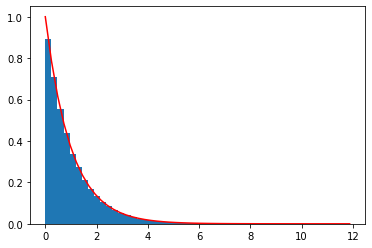

In [3]:


lambd = 1  
trials = 100000  
passenger_wait_times = []

for _ in range(trials):
    passenger_arrival_time = np.random.uniform(0, 10)
    bus_interarrival_times = np.random.exponential(lambd, size=1000)
    bus_arrival_times = np.cumsum(bus_interarrival_times)
    index = bus_arrival_times.searchsorted(passenger_arrival_time)
    passenger_wait_times.append(bus_arrival_times[index] - passenger_arrival_time)

print(
    'Expected passenger wait time:',
    np.mean(passenger_wait_times))
plt.hist(passenger_wait_times, bins=50, density=True)

x = np.linspace(0, max(passenger_wait_times))
plt.plot(x, sts.expon.pdf(x, scale=1/lambd), 'r-')

plt.show()

Expected passenger wait time: 0.6751056165716284


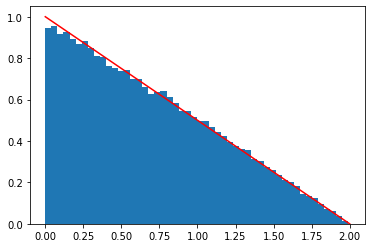

In [4]:
lambd = 1  
          
trials = 100000  

passenger_wait_times = []

for _ in range(trials):
    passenger_arrival_time = np.random.uniform(0, 10)
    bus_interarrival_times = np.random.uniform(0, 2 * lambd, size=1000)
    bus_arrival_times = np.cumsum(bus_interarrival_times)
    index = bus_arrival_times.searchsorted(passenger_arrival_time)
    passenger_wait_times.append(bus_arrival_times[index] - passenger_arrival_time)

print(
    'Expected passenger wait time:',
    np.mean(passenger_wait_times))
plt.hist(passenger_wait_times, bins=50, density=True)

x = np.linspace(0, 2)
plt.plot(x, 1-x/2, 'r-')
plt.show()

# Exercise 24

In [4]:
data = {
50: 0.00832, 51: 0.00911, 52: 0.00996, 53: 0.01089, 54: 0.01190,
55: 0.01300, 56: 0.01421, 57: 0.01554, 58: 0.01700, 59: 0.01859,
60: 0.02034, 61: 0.02224, 62: 0.02431, 63: 0.02657, 64: 0.02904,
65: 0.03175, 66: 0.03474, 67: 0.03804, 68: 0.04168, 69: 0.04561,
70: 0.04979, 71: 0.05415, 72: 0.05865, 73: 0.06326, 74: 0.06812,
75: 0.07337, 76: 0.07918, 77: 0.08570, 78: 0.09306, 79: 0.10119,
80: 0.10998, 81: 0.11935, 82: 0.12917, 83: 0.13938, 84: 0.15001,
85: 0.16114, 86: 0.17282, 87: 0.18513, 88: 0.19825, 89: 0.21246,
90: 0.22814, 91: 0.24577, 92: 0.26593, 93: 0.28930, 94: 0.31666,
95: 0.35124, 96: 0.40056, 97: 0.48842, 98: 0.66815, 99: 0.72000,
100: 0.76000, 101: 0.80000, 102: 0.85000, 103: 0.90000,
104: 0.96000, 105: 1.00000}

In [7]:
def check_death(prob):
    return np.random.uniform(0,1) >= prob


def simulate():
    final_amount = []
    money = 150000

    for year in data:
        
        growth = np.random.normal(0.08, 0.09)

        if year < 70:
            money += 10000
            money = money*growth
        if year >= 70:
            money -= 65000
            money = money*growth
            
        final_amount.append(money)
            
        if data[year] >= np.random.uniform(0,1):
            return final_amount[-1]
        else:
            continue
        
    return final_amount[-1]

        

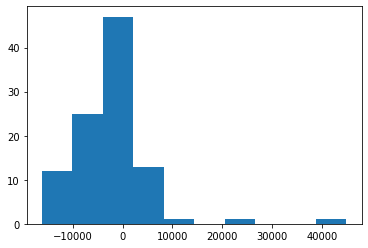

In [12]:
import matplotlib.pyplot as plt

values = []
for i in range(100):
    value = simulate()
    values.append(value)
    
plt.figure()    
plt.hist(values)
plt.show()